In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras

Using TensorFlow backend.
/anaconda3/envs/tsa_course/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/envs/tsa_course/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/envs/tsa_course/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Keras intro

In [10]:
# generating data based on simple lin reg y = ma + b + c (noise)
m=2
b=3
x=np.linspace(0,50,100)
np.random.seed(101)
noise = np.random.normal(scale=4,size=len(x))

y=m*x+b+noise

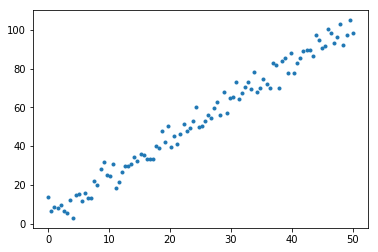

In [13]:
plt.plot(x,y,'.')

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()
model.add(Dense(4,input_dim=1,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='adam')

W0724 08:39:45.466408 4585838016 deprecation_wrapper.py:119] From /anaconda3/envs/tsa_course/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 08:39:45.506425 4585838016 deprecation_wrapper.py:119] From /anaconda3/envs/tsa_course/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 08:39:45.524835 4585838016 deprecation_wrapper.py:119] From /anaconda3/envs/tsa_course/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 08:39:45.570390 4585838016 deprecation_wrapper.py:119] From /anaconda3/envs/tsa_course/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x,y,epochs=200)

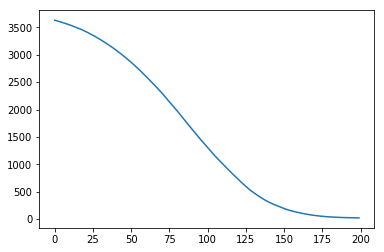

In [27]:
loss = model.history.history['loss']
epochs = range(len(loss))
plt.plot(epochs,loss)

In [ ]:
model.fit(x,y,epochs=20)

In [29]:
x_for_predictions = np.linspace(0,50,100)
y_pred = model.predict(x_for_predictions)

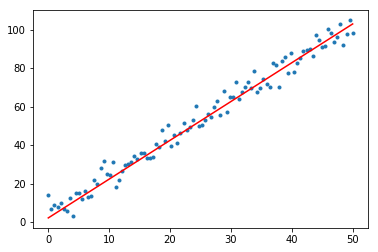

In [31]:
plt.plot(x,y,'.')
plt.plot(x_for_predictions,y_pred,'r')

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_pred)

18.705421708179635

# Timeseries forecasting with LSTM

In [37]:
df = pd.read_csv('_sources/TSA_COURSE_NOTEBOOKS/Data/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)

In [39]:
df.index.freq = 'MS'

In [42]:
df.columns = ['Sales']

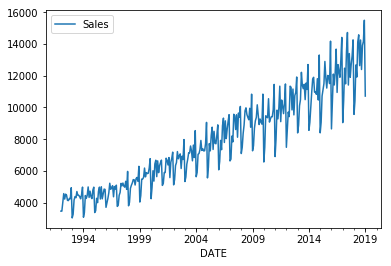

In [43]:
df.plot()

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

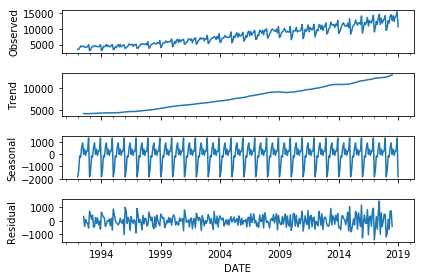

In [46]:
seasonal_decompose(df['Sales']).plot();

In [49]:
train = df[:-12]
test = df[-12:]

In [50]:
test

,Sales
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [54]:
series = np.array([23,16,54,29])
series/series.max()

array([0.42592593, 0.2962963 , 1.        , 0.53703704])

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler()
scaler.fit(train)

/anaconda3/envs/tsa_course/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [59]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [60]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [66]:
len(scaled_train)

313

In [69]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [80]:
n_input = 12
n_features = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [81]:
model = Sequential()

model.add(LSTM(150,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')


In [82]:
model.fit_generator(train_generator,epochs=25)

Epoch 1/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0244
Epoch 2/25
301/301 [==============================] - 2s 8ms/step - loss: 0.0097
Epoch 3/25
301/301 [==============================] - 2s 8ms/step - loss: 0.0083
Epoch 4/25
301/301 [==============================] - 2s 8ms/step - loss: 0.0068
Epoch 5/25
301/301 [==============================] - 2s 8ms/step - loss: 0.0061
Epoch 6/25
301/301 [==============================] - 3s 8ms/step - loss: 0.0061
Epoch 7/25
301/301 [==============================] - 2s 8ms/step - loss: 0.0055
Epoch 8/25
301/301 [==============================] - 2s 8ms/step - loss: 0.0038
Epoch 9/25
301/301 [==============================] - 2s 8ms/step - loss: 0.0030
Epoch 10/25
301/301 [==============================] - 2s 8ms/step - loss: 0.0029
Epoch 11/25
301/301 [==============================] - 2s 8ms/step - loss: 0.0022
Epoch 12/25
301/301 [==============================] - 2s 8ms/step - loss: 0.0025
Epoch 13/25
301/301 [===

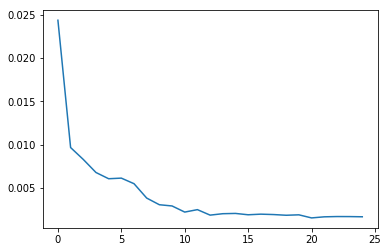

In [83]:
myloss = model.history.history['loss']
plt.plot(range(len(myloss)),myloss)

In [95]:
first_eval_batch = scaled_train[-12:]
first_eval_batch=first_eval_batch.reshape((1,n_input,n_features))
first_eval_batch


array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [90]:
model.predict(first_eval_batch)

array([[0.7833082]], dtype=float32)

In [96]:
# holding preds
test_predictions = []
# last n inputs from train set
first_eval_batch = scaled_train[-n_input:]
current_eval_batch=first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    # predicting one batch
    current_pred = model.predict(current_eval_batch)[0]
    # appending to predictions array
    test_predictions.append(current_pred)
    # droping first value from orig batch and adding new prediction
    current_eval_batch = np.append(current_eval_batch[:,1:,:],[[current_pred]],axis=1)


In [97]:
test_predictions

[array([0.7833082], dtype=float32),
 array([0.91390383], dtype=float32),
 array([0.8821289], dtype=float32),
 array([1.0610074], dtype=float32),
 array([1.1330944], dtype=float32),
 array([0.8786824], dtype=float32),
 array([1.0115113], dtype=float32),
 array([0.89426035], dtype=float32),
 array([0.9681136], dtype=float32),
 array([1.0295745], dtype=float32),
 array([1.0888922], dtype=float32),
 array([0.7232203], dtype=float32)]

In [99]:
true_predictions = scaler.inverse_transform(test_predictions)

In [100]:
test['Predictions'] = true_predictions

/anaconda3/envs/tsa_course/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


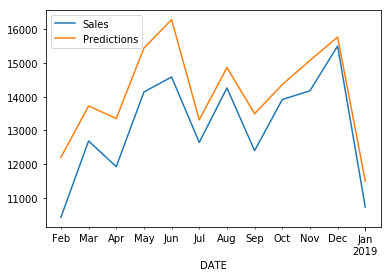

In [101]:
test.plot()

In [102]:
model.save('_model_20190725.h5')

In [104]:
!ls

3_NumPy_recap.ipynb              8_GFM_VAR(MA).ipynb
4_Pandas_recap.ipynb             8_GFM_descriptive_stats.ipynb
5_Pandas_visualisation.ipynb     8_GFM_excercises.ipynb
6_Pandas_timeseries.ipynb        8_GeneralForecastingModels.ipynb
7_Statsmodels.ipynb              9_DL_TSA.ipynb
8_GFM_ARIMA.ipynb                _sources
8_GFM_SARIMA(X).ipynb            model_20190725.h5


In [106]:
from keras.models import load_model
new_model = load_model('_model_20190725.h5')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


# Excercise

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
df = pd.read_csv('_sources/TSA_COURSE_NOTEBOOKS/Data/Miles_Traveled.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [113]:
df.columns = ['Miles']

In [114]:
df.head(3)

,Miles
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0


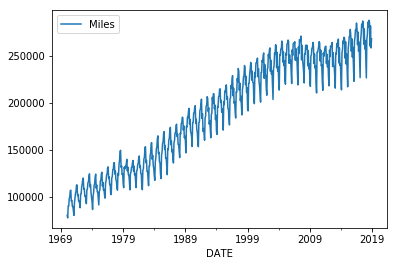

In [115]:
df.plot()

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose

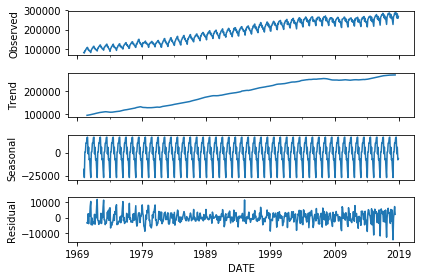

In [118]:
seasonal_decompose(df['Miles']).plot();

In [119]:
len(df)

588

In [120]:
nobs=12
train = df[:-nobs]
test = df[-nobs:]

In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [123]:
scaled_train = scaler.transform(train)

In [124]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [132]:
n_inputs = 12
n_features = 1
n_batches = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=n_batches)

In [133]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [137]:
X,y = train_generator[0]

In [138]:
X.shape, y.shape

((1, 12, 1), (1, 1))

In [140]:
model = Sequential()
model.add(LSTM(150,activation='relu',input_shape=(n_inputs,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')


In [141]:
model.fit_generator(train_generator,epochs=25)

Epoch 1/25
564/564 [==============================] - 5s 9ms/step - loss: 0.0138
Epoch 2/25
564/564 [==============================] - 4s 8ms/step - loss: 0.0059
Epoch 3/25
564/564 [==============================] - 5s 8ms/step - loss: 0.0041
Epoch 4/25
564/564 [==============================] - 4s 8ms/step - loss: 0.0025
Epoch 5/25
564/564 [==============================] - 5s 8ms/step - loss: 0.0023
Epoch 6/25
564/564 [==============================] - 5s 8ms/step - loss: 0.0014
Epoch 7/25
564/564 [==============================] - 5s 9ms/step - loss: 0.0013
Epoch 8/25
564/564 [==============================] - 4s 8ms/step - loss: 0.0013
Epoch 9/25
564/564 [==============================] - 4s 7ms/step - loss: 0.0011
Epoch 10/25
564/564 [==============================] - 4s 8ms/step - loss: 0.0012
Epoch 11/25
564/564 [==============================] - 4s 8ms/step - loss: 0.0012
Epoch 12/25
564/564 [==============================] - 4s 8ms/step - loss: 8.8340e-04
Epoch 13/25
564/564 [

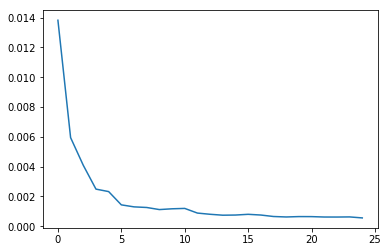

In [142]:
loss = model.history.history['loss']
plt.plot(range(len(loss)),loss)

In [166]:
first_eval_batch = scaled_train[-n_inputs:].reshape((1,n_inputs,n_features))


In [167]:
first_eval_batch

array([[[0.79630397],
        [0.71226435],
        [0.90477416],
        [0.93121043],
        [0.98386382],
        [0.96757519],
        [1.        ],
        [0.9801859 ],
        [0.8824684 ],
        [0.95995255],
        [0.85883345],
        [0.90086755]]])

In [155]:
scaled_predictions = []
eval_batch = first_eval_batch
for i in range(len(test)):
    scaled_predictions.append(model.predict(eval_batch)[0])
    eval_batch = np.append(eval_batch[:,1:,:],[[scaled_predictions[-1]]],axis=1)

In [156]:
scaled_predictions

[array([0.8069443], dtype=float32),
 array([0.74195], dtype=float32),
 array([0.89198214], dtype=float32),
 array([0.92076415], dtype=float32),
 array([0.97077936], dtype=float32),
 array([0.96065307], dtype=float32),
 array([0.98678833], dtype=float32),
 array([0.9688608], dtype=float32),
 array([0.8924747], dtype=float32),
 array([0.94694173], dtype=float32),
 array([0.8661264], dtype=float32),
 array([0.89593047], dtype=float32)]

In [157]:
true_predictions = scaler.inverse_transform(scaled_predictions)

In [158]:
test['Predictions']=true_predictions

/anaconda3/envs/tsa_course/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


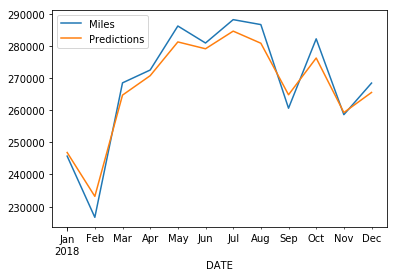

In [159]:
test.plot()

In [160]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(test['Miles'],test['Predictions']))

4057.598867838723

In [161]:
test['Miles'].mean()

268739.6666666667

In [165]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [162]:
model.save('_model_20190725')

In [164]:
from keras.models import load_model
new_model = load_model('_model_20190725')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________
